In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timezone

In [10]:
# Save data in a DataFrame
data = pd.read_csv('/content/clean_data.csv')

In [12]:
# Clean date column
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

In [13]:
# Explore data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18273 entries, 0 to 18272
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   videoId           18273 non-null  object             
 1   title             18273 non-null  object             
 2   description       17897 non-null  object             
 3   tags              17845 non-null  object             
 4   publishedAt       18273 non-null  datetime64[ns, UTC]
 5   duration          18273 non-null  object             
 6   category          18273 non-null  object             
 7   viewCount         18273 non-null  int64              
 8   likeCount         18273 non-null  int64              
 9   commentCount      18272 non-null  float64            
 10  duration_seconds  18273 non-null  int64              
 11  duration_minutes  18273 non-null  float64            
 12  duration_hours    18273 non-null  float64            
dtypes

In [14]:
# Function to calculate video counts at different frequencies

def calculate_video_counts(df):
    """
    Calculate video counts at different time frequencies.

    Input:
        df: pandas DataFrame with columns ['videoId', 'publishedAt']

    Output:
        dict with:
            - daily_video_count
            - weekly_video_count
            - monthly_video_count
            - yearly_video_count
    """

    data = df.copy()

    counts = {
        "daily_video_count": (data.groupby(data["publishedAt"].dt.date)["videoId"].count()),
        "weekly_video_count": (data.groupby(data["publishedAt"].dt.to_period("W"))["videoId"].count()),
        "monthly_video_count": (data.groupby(data["publishedAt"].dt.to_period("M"))["videoId"].count()),
        "yearly_video_count": (data.groupby(data["publishedAt"].dt.to_period("Y"))["videoId"].count()),
    }

    return counts

In [23]:
# function to filter dates

def filter_dates(series, start=None, end=None):
    """
    Filter a Series produced by calculate_video_counts().
    """

    s = series.copy()

    # Convert PeriodIndex → Timestamp
    if isinstance(s.index, pd.PeriodIndex):
        s.index = s.index.to_timestamp()

    # Convert datetime.date → Timestamp (THIS fixes your error)
    if isinstance(s.index[0], pd.Timestamp) is False:
        s.index = pd.to_datetime(s.index)

    if start is not None:
        s = s[s.index >= pd.to_datetime(start)]
    if end is not None:
        s = s[s.index <= pd.to_datetime(end)]

    return s

In [26]:
# Function to plot a line graph of number of videos over time

def plot_video_counts(video_count_series):
    """
    Plot a line graph from a video count Series.

    Input
    -----
    video_count_series : pandas Series
        Index = date / period
        Values = video counts
    """

    series = video_count_series.copy()

    # Convert PeriodIndex to Timestamp if needed (for nicer plots)
    if isinstance(series.index, pd.PeriodIndex):
        series.index = series.index.to_timestamp()

    plt.figure(figsize=(8, 4))
    plt.plot(series.index, series.values)
    plt.title("Video Count Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Videos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
# dictionary with video counts at different frequencies
video_counts = calculate_video_counts(data)

/tmp/ipython-input-4110448773.py:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "weekly_video_count": (data.groupby(data["publishedAt"].dt.to_period("W"))["videoId"].count()),
/tmp/ipython-input-4110448773.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "monthly_video_count": (data.groupby(data["publishedAt"].dt.to_period("M"))["videoId"].count()),
/tmp/ipython-input-4110448773.py:24: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "yearly_video_count": (data.groupby(data["publishedAt"].dt.to_period("Y"))["videoId"].count()),


In [18]:
video_counts["monthly_video_count"].info()

<class 'pandas.core.series.Series'>
PeriodIndex: 132 entries, 2015-01 to 2025-12
Freq: M
Series name: videoId
Non-Null Count  Dtype
--------------  -----
132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


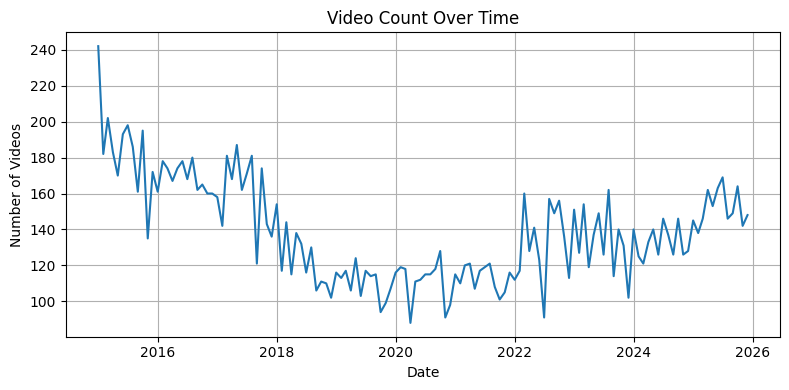

In [27]:
# Plot a line graph of video counts at monthly frequency
plot_video_counts(video_counts["monthly_video_count"])

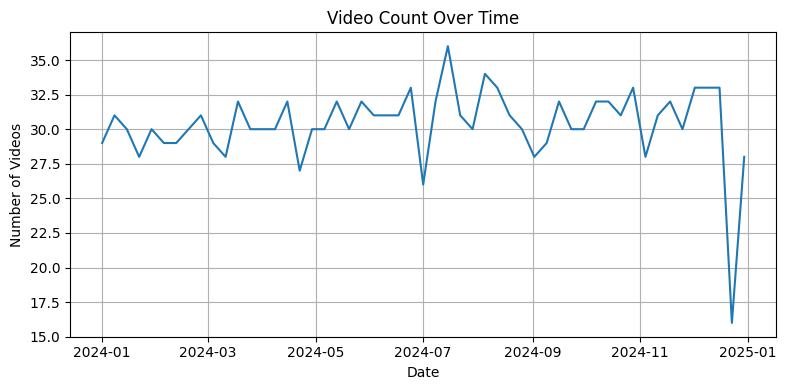

In [31]:
# Plot a line graph of video counts at weekly frequency for 2024
plot_video_counts(
    filter_dates(
        video_counts["weekly_video_count"],
        start="2024-01-01",
        end="2024-12-31"))

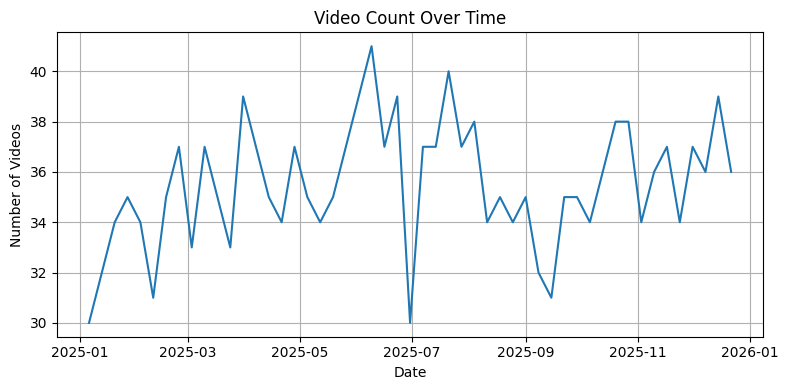

In [34]:
# Plot a line graph of video counts at weekly frequency for 2025
plot_video_counts(
    filter_dates(
        video_counts["weekly_video_count"],
        start="2025-01-01",
        end="2025-12-31"))

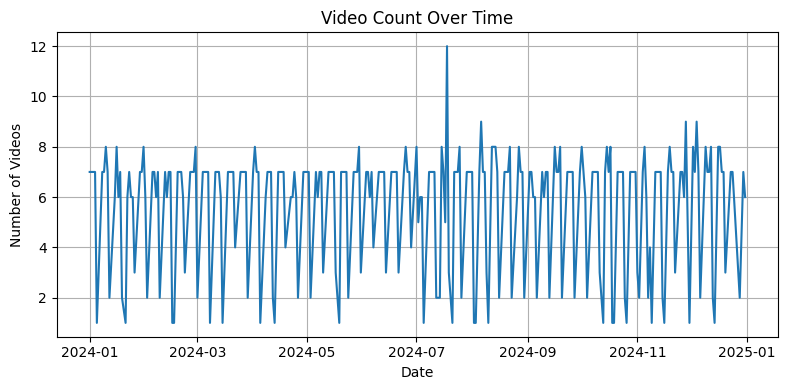

In [32]:
# Plot a line graph of video counts at daily frequency for 2024
plot_video_counts(
    filter_dates(
        video_counts["daily_video_count"],
        start="2024-01-01",
        end="2024-12-31"))

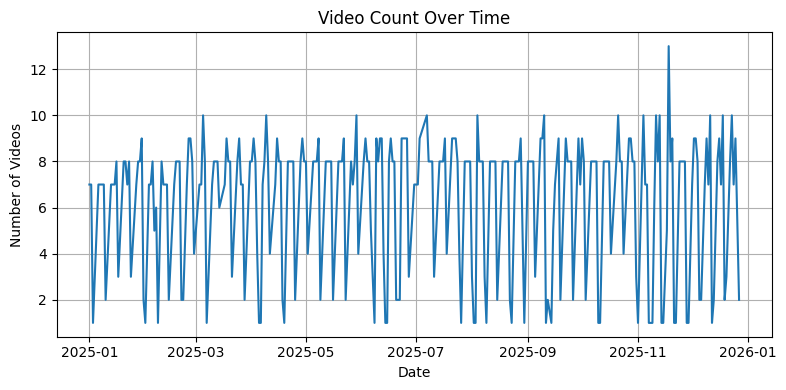

In [33]:
# Plot a line graph of video counts at daily frequency for 2025
plot_video_counts(
    filter_dates(
        video_counts["daily_video_count"],
        start="2025-01-01",
        end="2025-12-31"))